In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout,Input,MaxPool2D

from keras.datasets import cifar10

from keras.utils import to_categorical

In [28]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [8]:
labels = ['airplane','automobile','bird' ,'cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

In [29]:
print(f"xtrain shape: {x_train.shape}\nytrain shape: {y_train.shape}\nxtest shape: {x_test.shape}\nytest shape: {y_test.shape} ")

xtrain shape: (50000, 32, 32, 3)
ytrain shape: (50000, 1)
xtest shape: (10000, 32, 32, 3)
ytest shape: (10000, 1) 


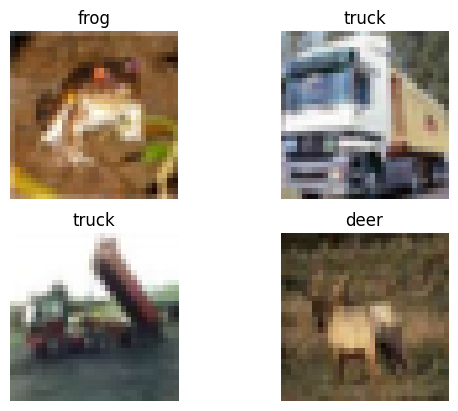

In [34]:
for i in range(0,4):
  plt.subplot(2,2,i+1)
  plt.imshow(x_train[i])
  plt.title(labels[y_train[i][0]])
  plt.axis('off')

In [35]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
def create_model():
  model = Sequential()
  model.add(Conv2D(64,(3,3),input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(2,2))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  return model

In [51]:
model = create_model()

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 0.9518 - accuracy: 0.6663 - val_loss: 0.8990 - val_accuracy: 0.6846
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7919 - accuracy: 0.7238 - val_loss: 0.8589 - val_accuracy: 0.7014
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6831 - accuracy: 0.7609 - val_loss: 0.8443 - val_accuracy: 0.7100
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5910 - accuracy: 0.7934 - val_loss: 0.8797 - val_accuracy: 0.7150
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5077 - accuracy: 0.8199 - val_loss: 0.9193 - val_accuracy: 0.7201
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4360 - accuracy: 0.8463 - val_loss: 0.9352 - val_accuracy: 0.7203
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3698 - accuracy: 0.8674 - val_loss: 1.0327 - val_accura

In [68]:
input_image = np.expand_dims(x_test[0], axis=0)
y_pred = model.predict(input_image)
print(labels[np.argmax(y_pred,axis=1)[0]])

1/1 [==============================] - 0s 31ms/step
cat


In [72]:
np.argmax(y_test[0])

3

1/1 [==============================] - 0s 58ms/step


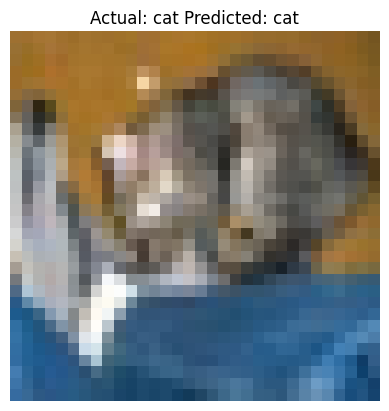

1/1 [==============================] - 0s 58ms/step


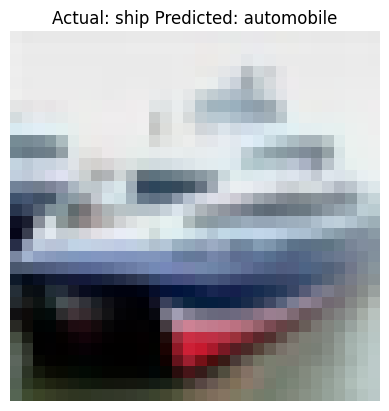

1/1 [==============================] - 0s 33ms/step


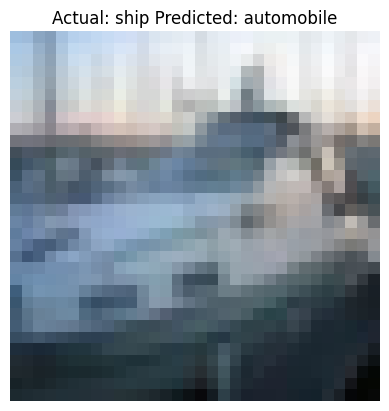

1/1 [==============================] - 0s 30ms/step


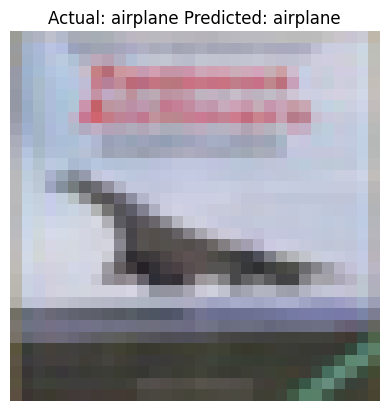

In [75]:
for i in range(0,4):
  input_image = np.expand_dims(x_test[i],axis=0)
  y_pred = np.argmax(model.predict(input_image),axis=1)[0]
  plt.imshow(x_test[i])
  plt.title(f"Actual: {labels[np.argmax(y_test[i])]} Predicted: {labels[y_pred]}")
  plt.axis("off")
  plt.show()

In [76]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [78]:
y_pred = np.argmax(y_pred,axis=1)

In [79]:
y_pred

array([3, 1, 1, ..., 5, 0, 7])

In [89]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [95]:
from sklearn.metrics import *
import seaborn as sns

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.81      0.82      0.81      1000
           2       0.72      0.50      0.59      1000
           3       0.51      0.50      0.50      1000
           4       0.64      0.70      0.67      1000
           5       0.60      0.60      0.60      1000
           6       0.79      0.80      0.79      1000
           7       0.68      0.81      0.74      1000
           8       0.83      0.81      0.82      1000
           9       0.75      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



<Axes: >

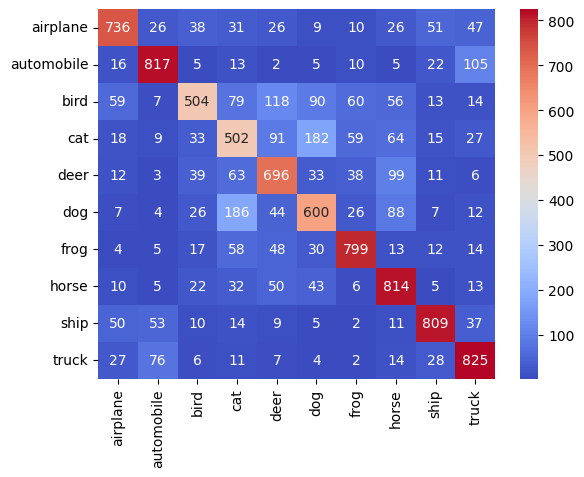

In [103]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=labels,yticklabels=labels,cmap='coolwarm',fmt='d')